# PySESync: SE-Sync Python bindings 🐍

This notebook demonstrates the use of SE-Sync's Python bindings

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections as mc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.animation as animation

%matplotlib notebook

Import the SE-Sync Python library built using pybind

In [2]:
import PySESync

Load in some data from a .g2o file

In [3]:
#filename = "../../data/intel.g2o"
filename = "../../data/rim.g2o"


measurements, num_poses = PySESync.read_g2o_file(filename)

d = measurements[0].R.shape[0]

print("Loaded %d measurements between %d %d-dimensional poses from file %s" % (len(measurements), num_poses, d, filename))

Loaded 29743 measurements between 10195 3-dimensional poses from file ../../data/rim.g2o


### Run SE-Sync!

Set SE-Sync options

In [4]:
opts = PySESync.SESyncOpts()
opts.num_threads = 4
opts.verbose=True

opts.r0 = d
opts.formulation = PySESync.Formulation.Explicit    # Options are Simplified or Explicit
opts.initialization = PySESync.Initialization.Random   # Options are Chordal or Random

# Termination criteria
opts.rel_func_decrease_tol = 1e-6
opts.min_eig_num_tol = 1e-3
opts.max_time = 900

# We will record the sequence of iterates generated by the SE-Sync algorithm as it runs,
# in order to generate an animation of the solution process
opts.log_iterates = True


# Save the solution animation to a video file?
save_animation = True

Run SE-Sync!

In [5]:
result = PySESync.SESync(measurements, opts)

Constructing SE-Sync problem instance ... elapsed computation time: 0.35 seconds

========= SE-Sync ==========

ALGORITHM SETTINGS:

SE-Sync settings:
 SE-Sync problem formulation: Explicit
 Initial level of Riemannian staircase: 3
 Maximum level of Riemannian staircase: 10
 Tolerance for accepting an eigenvalue as numerically nonnegative in optimality verification: 0.001
 LOBPCG block size: 4
 LOBPCG preconditioner maximum fill factor: 3
 LOBPCG preconditioner drop tolerance: 0.001
 Maximum number of LOBPCG iterations for escape direction computation: 100
 Initialization method: random
 Logging entire sequence of Riemannian Staircase iterates
 Running SE-Sync with 4 threads

Riemannian trust-region settings:
 Stopping tolerance for norm of Riemannian gradient: 0.01
 Stopping tolerance for norm of preconditioned Riemannian gradient: 0.0001
 Stopping tolerance for relative function decrease: 1e-06
 Stopping tolerance for the norm of an accepted update step: 0.001
 Maximum number of trus

Iter:   33, time: 6.908e+00, f:  4.945e+06, |g|: 2.098e+04, |M^{-1}g|: 4.817e+03, Delta: 1.421e+02, inner iters:    11, |h|: 5.114e+01, |h|_M: 1.421e+02, df: -1.977e+04, rho: -2.092e-01. Step REJECTED!
Iter:   34, time: 7.260e+00, f:  4.945e+06, |g|: 2.098e+04, |M^{-1}g|: 4.817e+03, Delta: 3.553e+01, inner iters:     7, |h|: 1.781e+01, |h|_M: 3.553e+01, df:  3.679e+04, rho:  9.824e-01. Step accepted
Iter:   35, time: 7.521e+00, f:  4.908e+06, |g|: 1.231e+04, |M^{-1}g|: 2.203e+03, Delta: 8.882e+01, inner iters:     8, |h|: 3.129e+01, |h|_M: 8.882e+01, df:  3.312e+04, rho:  9.682e-01. Step accepted
Iter:   36, time: 7.808e+00, f:  4.875e+06, |g|: 1.514e+04, |M^{-1}g|: 2.839e+03, Delta: 2.220e+02, inner iters:    14, |h|: 7.001e+01, |h|_M: 2.220e+02, df:  6.365e+04, rho:  8.502e-01. Step accepted
Iter:   37, time: 8.272e+00, f:  4.811e+06, |g|: 2.020e+04, |M^{-1}g|: 4.960e+03, Delta: 2.220e+02, inner iters:    12, |h|: 8.480e+01, |h|_M: 2.220e+02, df: -3.074e+05, rho: -1.939e+00. Step REJ

Iter:   74, time: 3.158e+01, f:  4.492e+06, |g|: 5.742e+03, |M^{-1}g|: 1.288e+03, Delta: 1.972e+02, inner iters:    32, |h|: 5.098e+01, |h|_M: 1.972e+02, df: -4.047e+04, rho: -3.526e+00. Step REJECTED!
Iter:   75, time: 3.247e+01, f:  4.492e+06, |g|: 5.742e+03, |M^{-1}g|: 1.288e+03, Delta: 4.930e+01, inner iters:    30, |h|: 1.124e+01, |h|_M: 4.930e+01, df:  4.325e+03, rho:  7.905e-01. Step accepted
Iter:   76, time: 3.331e+01, f:  4.488e+06, |g|: 2.452e+03, |M^{-1}g|: 4.078e+02, Delta: 4.930e+01, inner iters:    30, |h|: 1.520e+01, |h|_M: 4.930e+01, df: -1.696e+03, rho: -1.018e+00. Step REJECTED!
Iter:   77, time: 3.411e+01, f:  4.488e+06, |g|: 2.452e+03, |M^{-1}g|: 4.078e+02, Delta: 1.233e+01, inner iters:    16, |h|: 2.963e+00, |h|_M: 1.233e+01, df:  8.681e+02, rho:  9.954e-01. Step accepted
Iter:   78, time: 3.458e+01, f:  4.487e+06, |g|: 9.710e+02, |M^{-1}g|: 1.732e+02, Delta: 3.081e+01, inner iters:    21, |h|: 9.889e+00, |h|_M: 3.081e+01, df:  5.035e+02, rho:  9.213e-01. Step ac

Iter:  115, time: 6.913e+01, f:  4.475e+06, |g|: 1.487e+03, |M^{-1}g|: 3.545e+02, Delta: 6.842e+01, inner iters:    56, |h|: 4.546e+01, |h|_M: 6.842e+01, df:  4.830e+00, rho:  7.276e-03. Step REJECTED!
Iter:  116, time: 7.061e+01, f:  4.475e+06, |g|: 1.487e+03, |M^{-1}g|: 3.545e+02, Delta: 1.711e+01, inner iters:    39, |h|: 8.340e+00, |h|_M: 1.711e+01, df:  3.916e+02, rho:  9.955e-01. Step accepted
Iter:  117, time: 7.167e+01, f:  4.474e+06, |g|: 4.175e+02, |M^{-1}g|: 6.654e+01, Delta: 4.276e+01, inner iters:    38, |h|: 3.149e+01, |h|_M: 4.276e+01, df:  2.061e+02, rho:  8.586e-01. Step accepted
Iter:  118, time: 7.271e+01, f:  4.474e+06, |g|: 9.477e+02, |M^{-1}g|: 1.531e+02, Delta: 4.276e+01, inner iters:    47, |h|: 2.787e+01, |h|_M: 4.276e+01, df:  2.502e+02, rho:  6.279e-01. Step accepted
Iter:  119, time: 7.397e+01, f:  4.474e+06, |g|: 1.411e+03, |M^{-1}g|: 2.046e+02, Delta: 4.276e+01, inner iters:    40, |h|: 2.498e+01, |h|_M: 4.276e+01, df: -7.363e+02, rho: -1.412e+00. Step REJ

Iter:  156, time: 1.128e+02, f:  4.470e+06, |g|: 2.009e+02, |M^{-1}g|: 4.262e+01, Delta: 9.723e+00, inner iters:    34, |h|: 5.629e+00, |h|_M: 9.723e+00, df:  2.534e+01, rho:  9.882e-01. Step accepted
Iter:  157, time: 1.138e+02, f:  4.470e+06, |g|: 1.971e+02, |M^{-1}g|: 5.893e+01, Delta: 2.431e+01, inner iters:    52, |h|: 1.369e+01, |h|_M: 2.431e+01, df:  5.096e+01, rho:  9.419e-01. Step accepted
Iter:  158, time: 1.152e+02, f:  4.470e+06, |g|: 3.489e+02, |M^{-1}g|: 4.154e+01, Delta: 6.077e+01, inner iters:    59, |h|: 2.943e+01, |h|_M: 6.077e+01, df: -3.482e+02, rho: -2.071e+00. Step REJECTED!
Iter:  159, time: 1.167e+02, f:  4.470e+06, |g|: 3.489e+02, |M^{-1}g|: 4.154e+01, Delta: 1.519e+01, inner iters:    52, |h|: 7.121e+00, |h|_M: 1.519e+01, df:  5.805e+01, rho:  8.794e-01. Step accepted
Iter:  160, time: 1.181e+02, f:  4.470e+06, |g|: 3.058e+02, |M^{-1}g|: 9.496e+01, Delta: 1.519e+01, inner iters:    41, |h|: 6.389e+00, |h|_M: 1.519e+01, df:  5.325e+01, rho:  9.439e-01. Step acc

Iter:  197, time: 1.772e+02, f:  4.469e+06, |g|: 1.376e+02, |M^{-1}g|: 3.147e+01, Delta: 1.349e+01, inner iters:    58, |h|: 1.806e+01, |h|_M: 1.349e+01, df:  1.935e+01, rho:  1.020e+00. Step accepted
Iter:  198, time: 1.788e+02, f:  4.469e+06, |g|: 1.598e+02, |M^{-1}g|: 5.525e+01, Delta: 3.374e+01, inner iters:    77, |h|: 5.208e+01, |h|_M: 3.374e+01, df:  2.990e+01, rho:  8.031e-01. Step accepted
Iter:  199, time: 1.808e+02, f:  4.469e+06, |g|: 3.165e+02, |M^{-1}g|: 2.026e+02, Delta: 3.374e+01, inner iters:   110, |h|: 4.370e+01, |h|_M: 3.374e+01, df:  5.566e+01, rho:  9.417e-01. Step accepted
Iter:  200, time: 1.838e+02, f:  4.469e+06, |g|: 2.772e+02, |M^{-1}g|: 1.378e+02, Delta: 8.434e+01, inner iters:   129, |h|: 1.223e+02, |h|_M: 8.434e+01, df: -2.160e+02, rho: -2.254e+00. Step REJECTED!
Iter:  201, time: 1.871e+02, f:  4.469e+06, |g|: 2.772e+02, |M^{-1}g|: 1.378e+02, Delta: 2.108e+01, inner iters:    87, |h|: 2.879e+01, |h|_M: 2.108e+01, df:  4.246e+01, rho:  1.010e+00. Step acc

Iter:   19, time: 4.785e+00, f:  2.093e+04, |g|: 1.125e+04, |M^{-1}g|: 5.081e+03, Delta: 1.526e+02, inner iters:    19, |h|: 1.828e+02, |h|_M: 1.526e+02, df: -4.217e+05, rho: -1.632e+01. Step REJECTED!
Iter:   20, time: 5.430e+00, f:  2.093e+04, |g|: 1.125e+04, |M^{-1}g|: 5.081e+03, Delta: 3.815e+01, inner iters:    18, |h|: 3.523e+01, |h|_M: 3.815e+01, df:  7.707e+03, rho:  6.789e-01. Step accepted
Iter:   21, time: 6.036e+00, f:  1.322e+04, |g|: 5.942e+03, |M^{-1}g|: 4.688e+03, Delta: 3.815e+01, inner iters:    13, |h|: 6.038e+00, |h|_M: 1.158e+01, df:  3.152e+03, rho:  1.001e+00. Step accepted
Iter:   22, time: 6.488e+00, f:  1.007e+04, |g|: 1.700e+03, |M^{-1}g|: 3.103e+02, Delta: 3.815e+01, inner iters:    25, |h|: 4.352e+01, |h|_M: 3.815e+01, df:  1.137e+02, rho:  1.132e-01. Step accepted
Iter:   23, time: 7.304e+00, f:  9.957e+03, |g|: 3.590e+03, |M^{-1}g|: 1.094e+03, Delta: 3.815e+01, inner iters:    15, |h|: 3.906e+00, |h|_M: 4.572e+00, df:  8.250e+02, rho:  1.003e+00. Step acc

Iter:   60, time: 3.227e+01, f:  6.214e+03, |g|: 3.013e+02, |M^{-1}g|: 6.473e+01, Delta: 5.421e+00, inner iters:    14, |h|: 1.256e+01, |h|_M: 5.421e+00, df:  3.533e+01, rho:  7.367e-01. Step accepted
Iter:   61, time: 3.276e+01, f:  6.179e+03, |g|: 6.546e+02, |M^{-1}g|: 2.354e+02, Delta: 5.421e+00, inner iters:    18, |h|: 1.259e+01, |h|_M: 5.421e+00, df:  7.731e+01, rho:  1.020e+00. Step accepted
Iter:   62, time: 3.337e+01, f:  6.102e+03, |g|: 4.830e+02, |M^{-1}g|: 1.980e+02, Delta: 1.355e+01, inner iters:    25, |h|: 3.958e+01, |h|_M: 1.355e+01, df: -2.354e+01, rho: -2.513e-01. Step REJECTED!
Iter:   63, time: 3.415e+01, f:  6.102e+03, |g|: 4.830e+02, |M^{-1}g|: 1.980e+02, Delta: 3.388e+00, inner iters:    17, |h|: 8.607e+00, |h|_M: 3.388e+00, df:  4.171e+01, rho:  1.030e+00. Step accepted
Iter:   64, time: 3.479e+01, f:  6.060e+03, |g|: 3.148e+02, |M^{-1}g|: 8.513e+01, Delta: 8.470e+00, inner iters:    19, |h|: 2.691e+01, |h|_M: 8.470e+00, df:  1.686e+01, rho:  3.120e-01. Step acc

Iter:  101, time: 6.607e+01, f:  5.534e+03, |g|: 8.349e+01, |M^{-1}g|: 1.794e+01, Delta: 5.049e+00, inner iters:    46, |h|: 1.856e+01, |h|_M: 5.049e+00, df:  1.964e+00, rho:  4.265e-01. Step accepted
Iter:  102, time: 6.751e+01, f:  5.532e+03, |g|: 2.399e+02, |M^{-1}g|: 2.692e+02, Delta: 5.049e+00, inner iters:     5, |h|: 1.510e-01, |h|_M: 7.423e-02, df:  2.793e+00, rho:  1.000e+00. Step accepted
Iter:  103, time: 6.772e+01, f:  5.529e+03, |g|: 8.764e+01, |M^{-1}g|: 1.606e+01, Delta: 5.049e+00, inner iters:    51, |h|: 1.870e+01, |h|_M: 5.049e+00, df:  1.172e+00, rho:  2.608e-01. Step accepted
Iter:  104, time: 6.931e+01, f:  5.528e+03, |g|: 2.578e+02, |M^{-1}g|: 2.959e+02, Delta: 5.049e+00, inner iters:     5, |h|: 1.514e-01, |h|_M: 7.630e-02, df:  3.348e+00, rho:  1.000e+00. Step accepted
Iter:  105, time: 6.954e+01, f:  5.525e+03, |g|: 7.817e+01, |M^{-1}g|: 1.595e+01, Delta: 5.049e+00, inner iters:    57, |h|: 1.883e+01, |h|_M: 5.049e+00, df:  6.014e-01, rho:  1.521e-01. Step acce


Checking second order optimality ... 
Found second-order critical point! Elapsed computation time: 0.225 seconds.


===== END RIEMANNIAN STAIRCASE =====

Found global optimum!

Rounding solution ... elapsed computation time: 0.007 seconds

SDP RESULTS:
Value of dual SDP solution F(Y): 5460.79
Norm of Riemannian gradient grad F(Y): 0.453012
Value of primal SDP solution tr(Lambda): 5453.25
SDP duality gap: 7.54653

SE-SYNCHRONIZATION RESULTS:
Value of rounded pose estimates F(x): 5461.55
Suboptimality bound F(x) - tr(Lambda) of recovered pose estimate: 8.29873

Total elapsed computation time: 340.308 seconds

===== END SE-SYNC =====



## Plot some interesting data about the solution process

<IPython.core.display.Javascript object>


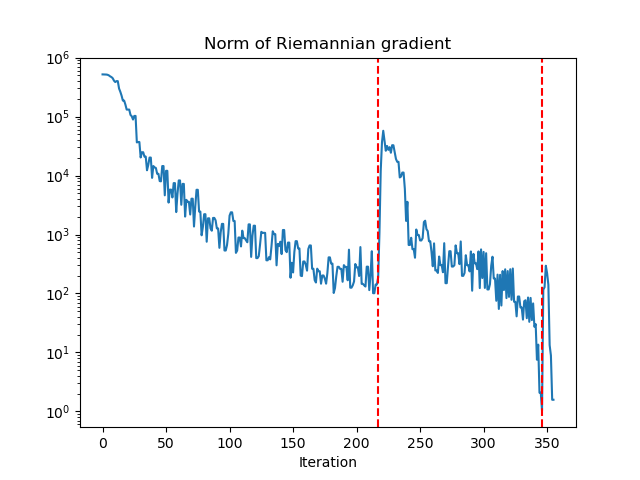

In [6]:
# Plot sequence of Riemannian gradient norms
fig, ax = plt.subplots()
grad_norms = np.concatenate(result.gradient_norms)
plt.semilogy(grad_norms)

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.gradient_norms) > 1:
    steps = np.cumsum([len(l) for l in result.gradient_norms[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(grad_norms.max()), color='red', linestyle='--')

plt.title("Norm of Riemannian gradient")
plt.xlabel("Iteration")

plt.show()

<IPython.core.display.Javascript object>


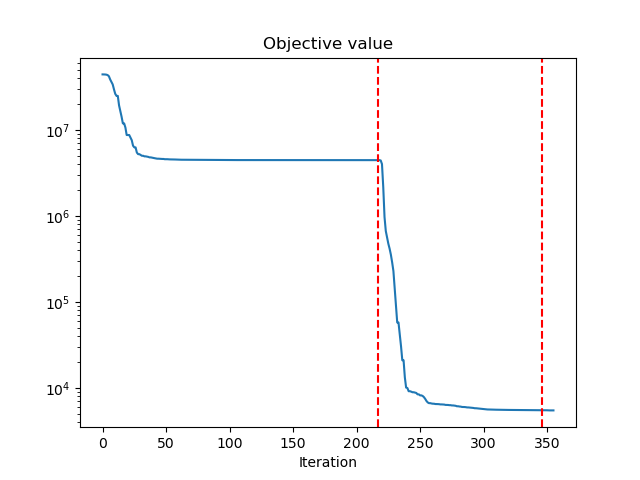

In [7]:
# Plot sequence of objective values
fig, ax = plt.subplots()
fvals = np.concatenate(result.function_values)
plt.semilogy(fvals)

# Set the following flag to "True" in order to draw red vertical 
# lines indicating iterations at which the relaxation rank 
# increased in the Riemannian Staircase
show_rank_increases = True

if show_rank_increases and len(result.function_values) > 1:
    steps = np.cumsum([len(l) for l in result.function_values[:-1]])
    for i in steps:
        plt.axvline(x=i, ymin=0, ymax=np.log10(fvals.max()), color='red', linestyle='--')


plt.title("Objective value")
plt.xlabel("Iteration")
plt.show()

### Plot estimated SLAM solution

Define some useful functions for visualizing SLAM solution

In [8]:
# Given a list of position estimates and a collection of measurements, this function constructs a list of
# pairs of the form (ti, tj), where ti and tj are the endpoints of a relative pose measurement
def construct_line_segments(t, measurements):
    lines = []
    
    for m in measurements:
        lines.append((t[:,m.i], t[:,m.j]))
    
    return lines

# Given an SESyncProblem instance, a low-rank factor Y for an estimated SDP solution X = YY', this function
# returns the rounded (projected) position estimates t
def get_rounded_position_estimates(prob, Y):
    # Get problem dimensions
    d = prob.dimension()
    n = prob.num_states()
    
    # Get relaxtion rank for the passed estimate Y
    r = Y.shape[0]
    
    # Compute rounded pose estimates
    xhat = prob.round_solution(Y)
    
    # Extract rotational and translational parts
    R0 = xhat[:, n : n + d]
    R0inv = R0.transpose()
    return np.matmul(R0inv, xhat[:, 0:n])

Plot the final SLAM estimate

<IPython.core.display.Javascript object>


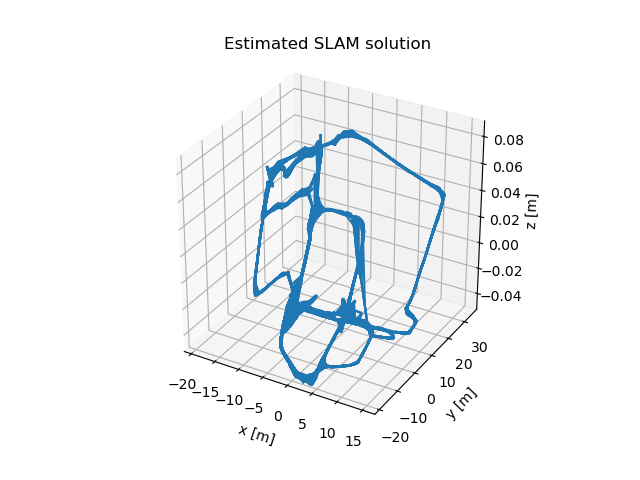

In [9]:
# Extract translational states from solution xhat
xhat = result.xhat
R0inv = np.linalg.inv(xhat[:, num_poses : num_poses + d])
t = np.matmul(R0inv, xhat[:, 0:num_poses])

# Construct set of inter-pose measurements at the estimated robot positions
lines = construct_line_segments(t, measurements)

# Determine dimension of problem

# Plot the estimated solution
fig = plt.figure()

if d == 2:
    ax = plt.gca()
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    
    lc = mc.LineCollection(lines)
    ax.add_collection(lc)
    ax.set_aspect('equal')

else:
    # d == 3
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(t[0, :].min(), t[0, :].max())
    ax.set_ylim(t[1, :].min(), t[1, :].max())
    ax.set_zlim(t[2, :].min(), t[2, :].max())
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    
    lc = Line3DCollection(lines)
    ax.add_collection3d(lc)
    ax.set_box_aspect((1,1,1))

plt.title("Estimated SLAM solution")
plt.show()

### Generate a video of the solution process

Compute rounded position estimates for each iterate generated during the entire optimization

In [10]:
# Construct SE-Sync problem instance
prob = PySESync.SESyncProblem(measurements, opts.formulation, opts.projection_factorization, \
                              opts.preconditioner, opts.reg_Chol_precon_max_cond)

# Record maximum and minimum x- and y- values of each estimated position; we will use these later
# to set the figure axis ranges
xmax = -float('inf')
xmin = float('inf')
ymax = -float('inf')
ymin = float('inf')
zmax = -float('inf')
zmin = float('inf')


# Construct a list of line collections, one for each estimated (rounded) solution
solns = []
for Ys in result.iterates:
    for Y in Ys:
        # Get rounded position estimates
        t = get_rounded_position_estimates(prob, Y)
        
        # Update maximum and minimum x- and y- values
        xmax = max(xmax, t[0, :].max())
        xmin = min(xmin, t[0, :].min())
        ymax = max(ymax, t[1, :].max())
        ymin = min(ymin, t[1, :].min())
        
        if d == 3:
            # Also record zmax and zmin values
            zmax = max(zmax, t[2, :].max())
            zmin = min(zmin, t[2, :].min())

        # Calculate the set of segments for this solution
        solns.append(construct_line_segments(t, measurements))

Render visualization!

<IPython.core.display.Javascript object>


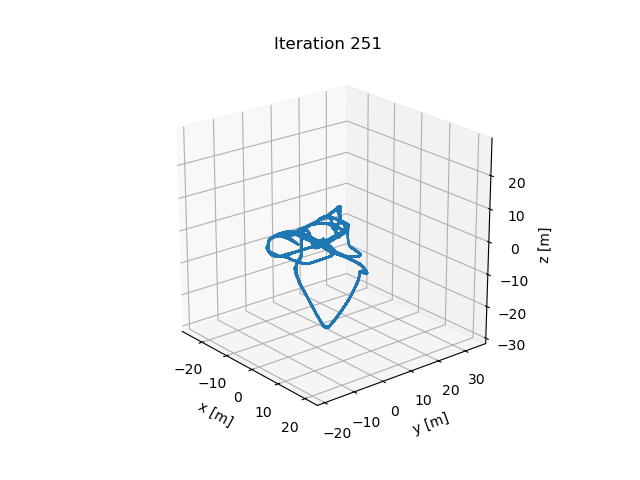

In [11]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

if d == 2:
    # Construct set of 2D axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_aspect('equal')

    # Initialize line collection and add it to the figure
    lc = mc.LineCollection([])
    ax.add_collection(lc)
    
else:
    # Construct set of 3D axes
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("z [m]")
    ax.set_box_aspect((1,1,1))
    
    # Initialize line collection and add it to the figure
    lc = Line3DCollection([])
    ax.add_collection3d(lc)
    


# Initialization function: plot the background of each frame
def init():
    lc.set_segments([])
    return lc

# Animation function.  This is called sequentially
def update(i):
    lc.set_segments(solns[i])
    ax.set_title("Iteration %d" % i)
    return lc

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(solns), interval=67)

if save_animation:
    # Save this animation to disk
    writer = animation.FFMpegWriter(fps = 15, codec='ffv1')
    anim.save('SESync.avi', writer=writer)